# Data Analysis

In [1]:
# Importing the required libraries
import pandas as pd   # Importing pandas for data manipulation and analysis
import seaborn as sb  # Importing seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from sklearn import preprocessing  # Importing preprocessing module from scikit-learn for data preprocessing
import numpy as np  # Importing numpy for mathematical operations
import math  # Importing math module for mathematical functions

# Defining the URL for the dataset
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the column names

In [ ]:
# Obtaining the column names of the DataFrame
df_columns = df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


It's necessary to check the data type of each variable as well as the presence of missing data.


In [ ]:
# Obtaining information about the DataFrame
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Initial Variable Analysis**

As observed in the initial analysis, we have a dataframe with 10 columns summarized as follows:

- PassengerId: integer data type with 891 non-null values.
- Survived (determines if the passenger survived or not): 
- Pclass (passenger class): integer data type with 891 non-null values.
- Name: object data type with 891 non-null values.
- Sex: object data type with 891 non-null values.
- Age: float data type with 714 non-null values.
- SibSp (number of siblings/spouses aboard): integer data type with 891 non-null values.
- Parch (number of parents/children aboard): integer data type with 891 non-null values.
- Ticket (ticket number): object data type with 891 non-null values.
- Fare: float data type with 891 non-null values.
- Cabin: object data type with 204 non-null values.
- Embarked (port of embarkation): object data type with 891 non-null values.


In [ ]:
# Checking for missing values in the DataFrame
missing_values = df.isna().sum()

<AxesSubplot:>

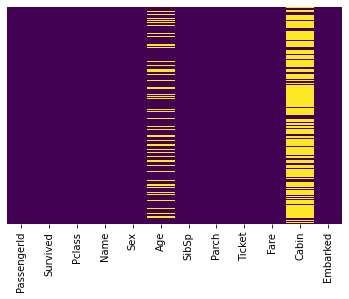

In [ ]:
# Creating a heatmap to visualize missing values in the DataFrame
sb.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Is it possible to visualize the count of passengers who survived using a histogram

<AxesSubplot:xlabel='Survived', ylabel='count'>

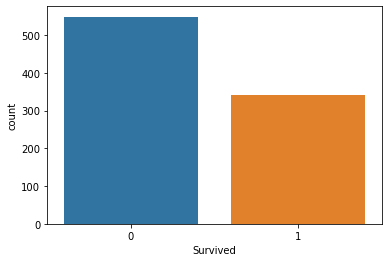

In [ ]:
# Creating a countplot to visualize the distribution of the 'Survived' variable in the DataFrame
sb.countplot(x='Survived', data=df)

### Sex variable

Is it also possible to visualize the count of passengers according to their gender

<AxesSubplot:xlabel='Survived', ylabel='count'>

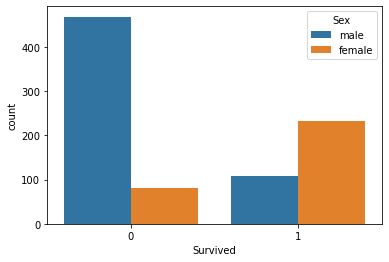

In [ ]:
# Creating a countplot with hue to visualize the distribution of 'Survived' variable based on 'Sex'
sb.countplot(x='Survived', hue='Sex', data=df)

Based on the provided information, it is not explicitly stated whether the "Sex" variable is determinative in defining whether the passengers survived or not. Further analysis and statistical tests would be required to assess the significance and influence of the "Sex" variable on the survival outcomes.


### Class

To get a better understanding of what the "Pclass" column represents, you can perform a count of the existing categories. Here's how you can do it:


In [ ]:
# Counting the occurrences of each value in the 'Pclass' column and resetting the index
pclass_counts = df['Pclass'].value_counts().reset_index()

,index,Pclass
0,3,491
1,1,216
2,2,184


To visualize the number of survivors according to their passenger class, you can use the following code:


<AxesSubplot:xlabel='Survived', ylabel='count'>

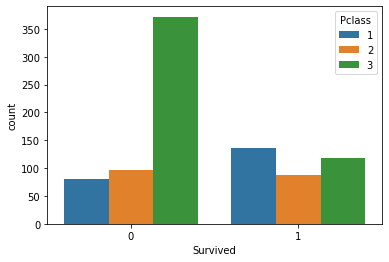

In [ ]:
sb.countplot(x='Survived',hue='Pclass',data=df)

It can be stated that the class is a determining factor in whether the passenger survived or not

### Place of Embarkation

Is it also possible to determine the distribution of deaths by port of embarkation

<AxesSubplot:xlabel='Survived', ylabel='count'>

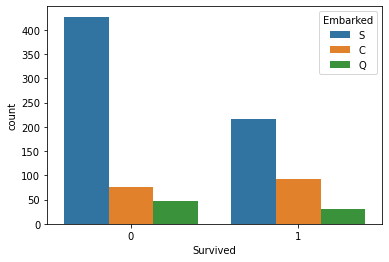

In [ ]:
sb.countplot(x='Survived',hue='Embarked',data=df)

Given the significant difference in passenger distribution, it is possible to determine that the port of embarkation needs to be taken into consideration for survival analysis.

### Age

By examining the distribution of the Age variable, it can be concluded that it exhibits a behavior similar to normal distribution.

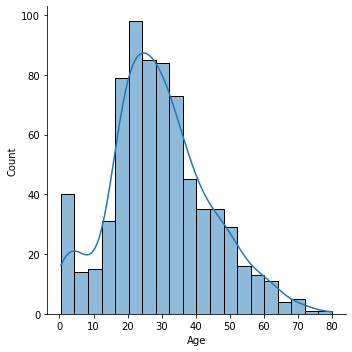

In [ ]:
sb.displot(df['Age'].dropna(),kde=True)

If we consider the survival of passengers under 20 years of age, the following result is obtained:


In [ ]:
# Extracting the 'Survived' and 'Age' columns
survived = df['Survived']
age_youth = df['Age'] < 20

# Creating a cross-tabulation of 'Age' and 'Survived' variables
cross_tab = pd.crosstab(age_youth, survived)
cross_tab

Survived,0,1
Age,,
False,464,263
True,85,79


If we consider the survival of passengers under 20 years of age and their gender, the following result is obtained:


In [ ]:
# Extracting the 'Sex' columns
sex = df['Sex']

# Creating a cross-tabulation of 'Sex', 'Age', and 'Survived' variables
pd.crosstab([sex,age_youth], survived)

Survived        0    1
Sex    Age            
female False   59  180
       True    22   53
male   False  405   83
       True    63   26

Based on the information provided, it can be said that the age variable has some impact on whether the passenger survived or not. Therefore, it is necessary to take age into consideration when analyzing the survival outcomes.


### Number of Parents/Children on Board

To check the number of survivors based on the number of parents/children on board, you can use the following code:


In [ ]:
# Creating a countplot with hue to visualize the distribution of 'Survived' variable based on 'Parch' (Parent/Child count)
sb.countplot(x='Survived',hue='Parch',data=df)

It can be analyzed that the majority of passengers did not have many parents or children on board. It can be inferred that most of them did not survive.


### Number of Siblings/Spouses on Board


<Axes: xlabel='Survived', ylabel='count'>

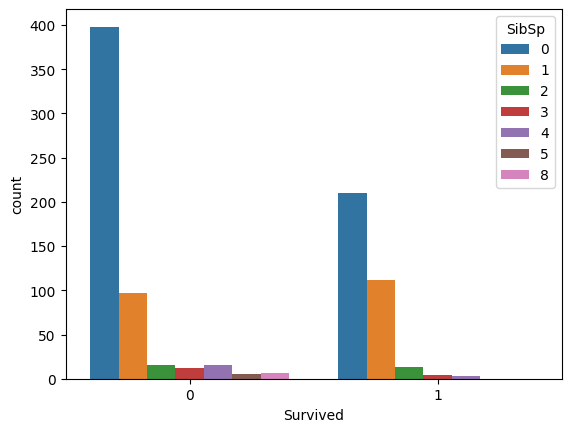

In [ ]:
# Creating a countplot with hue to visualize the distribution of 'Survived' variable based on 'SibSp' (Sibling/Spouse count)
sb.countplot(x='Survived',hue='SibSp',data=df)

It can be analyzed that the majority of passengers did not have many siblings on board. It can be inferred that most of them did not survive.


## Statistical Analysis


Statistical Analysis Visualization


In [ ]:
# Computing descriptive statistics of the DataFrame using the describe() method
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Based on this analysis, we can draw some conclusions:

- The majority of the tickets on the ship were for 2nd and 3rd class, with the passengers having an average age of around 30-31 years.
- Most of the passengers had at most 1 family member on board.
- The average fare for the tickets was 35 pounds, with a maximum cost of 512 pounds

## Variable recoding

Since the "Sex" variable is binary, its values can be replaced with 0 and 1.

In [ ]:
# Transforming the 'Sex' column to numeric values using a lambda function
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)


For the "Embarked" variable, you can perform a similar processing step. In this case, you can replace the port names using the `LabelEncoder` function from the `sklearn` library. This function assigns a number to each category of values present in the desired column.


In [ ]:
df['Embarked'] = preprocessing.LabelEncoder().fit_transform(df['Embarked'])
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Proposal for Value Imputation

### Column Deletion

Based on the percentage of null values per column, you can make decisions regarding whether to delete certain columns. 

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

Taking into consideration that the column associated with the passengers' cabin has a high percentage of missing values, one proposal would be to remove it from the dataset. 

In [ ]:
df.drop(columns="Cabin",inplace=True)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### To impute missing values using the mean or median


Given that the "Age" column has a small percentage of missing values, it is possible to replace those values with either the mean or the median. 


`df['Age'].fillna(df['Age'].mode(),inplace=True)`

### Value Imputation using Random Generation within Column's Distribution Range


Given the similarity of the "Age" variable to a normal distribution, it is possible to generate random values using the mean and standard deviation of the data. This approach, known as random imputation, can be a better solution as it replaces missing values with multiple values rather than just one as in mean imputation.


In [ ]:
def random_age(col):
    if np.isnan(col) == True:        
        while True:
            col = math.ceil(np.random.normal(29.699118,14.526497,1))
            if col > 0:
                break
    else:
        col = col
    return col
df['Age'] = df['Age'].apply(random_age)
df['Age'].isna().sum()

### Value imputation using mode

Since the "Embarked" variable only has 2 missing values, it is possible to replace those null values using the mode.

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 73.2+ KB


In [ ]:
df['fare'] = preprocessing.LabelEncoder().fit_transform(df['Embarked'])
df['Ticket'] = preprocessing.LabelEncoder().fit_transform(df['Embarked'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
 11  fare         891 non-null    int64  
dtypes: float64(2), int32(1), int64(8), object(1)
memory usage: 80.2+ KB


In [ ]:
df.drop(columns=['PassengerId','Name'],inplace =True)


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fare
0,0,3,1,22.0,1,0,2,7.2500,2,2
1,1,1,0,38.0,1,0,0,71.2833,0,0
2,1,3,0,26.0,0,0,2,7.9250,2,2
3,1,1,0,35.0,1,0,2,53.1000,2,2
4,0,3,1,35.0,0,0,2,8.0500,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int32  
 9   fare      891 non-null    int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 66.3 KB
